# **Assignment 03: Linear Regression**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("/content/housing.csv")
# View first 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
# Dataset shape (rows, columns)
df.shape
# Dataset information
df.info()
# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**1. Data Cleaning**

In [71]:
#1. Data Cleaning
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [72]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [73]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**2. Exploratory Data Analysis (EDA)**

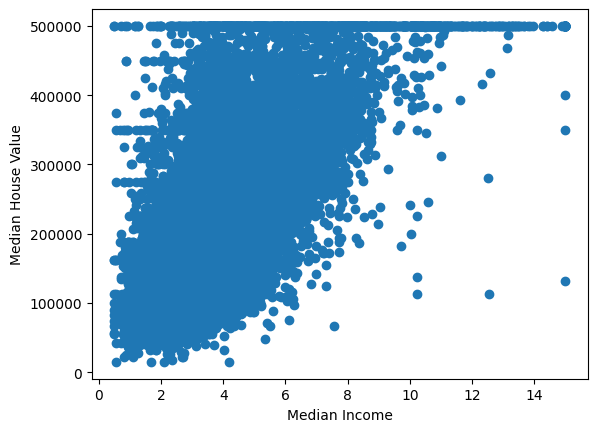

In [74]:
#Relationship between Income & House Value
plt.scatter(df["median_income"], df["median_house_value"])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


Define Input (X) and Output (y)  
Target variable: median_house_value

In [75]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


**3.Data split**

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**4.Linear Regression Model**

In [77]:
#check categorical colummns
df.select_dtypes(include='object').columns


Index(['ocean_proximity'], dtype='object')

In [78]:
#apply one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [79]:
#redefine x and y
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [82]:
#predict and evaluate
y_pred = model.predict(X_test)


**5. Model Evaluation**

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 4870925437.627649
R2 Score: 0.6486275482714201


**6.Interpretation & Conclusion**

In [84]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,longitude,-25336.374047
1,latitude,-24136.558263
2,housing_median_age,1032.979836
3,total_rooms,-5.464434
4,total_bedrooms,77.996159
5,population,-36.807660
6,households,67.971600
7,median_income,38581.379847
8,ocean_proximity_INLAND,-40749.073214
9,ocean_proximity_ISLAND,157081.471477


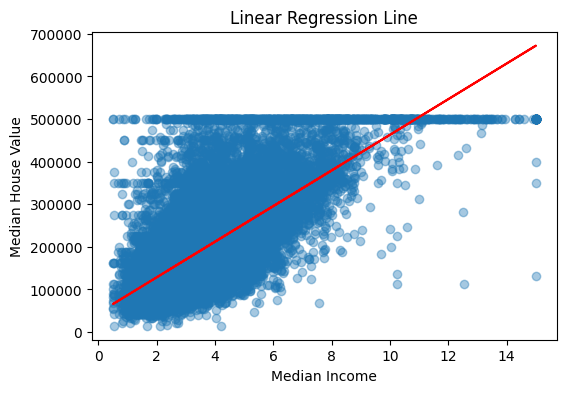

In [89]:
from sklearn.linear_model import LinearRegression

X_simple = df[["median_income"]]
y_simple = df["median_house_value"]

model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

y_line = model_simple.predict(X_simple)

plt.figure(figsize=(6,4))
plt.scatter(X_simple, y_simple, alpha=0.4)
plt.plot(X_simple, y_line, color='red')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression Line")
plt.show()
